In [1]:
import shutil, os
import cv2
import numpy as np
import pandas as pd
import glob
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
from patchify import patchify
import tifffile as tiff
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU
import random
import splitfolders

Segmentation Models: using `keras` framework.


## Crop the images and patchify them to 256_patches
### the jpgs for 1st 100 files have already been patched to 256 patches  , see folder 256_patches/images
### the masks for these files need to be updated by updating the masks with only the label of interest ---> vegetation
### folder is 256_patches/masks

In [ ]:
#Now, crop each large image into patches of 256x256. Save them into a directory 
#so we can use data augmentation and read directly from the drive. 
#root_directory = 'tram/'
#
#patch_size = 256
#
##Read images from repsective 'images' subdirectory
##As all images are of different size we have 2 options, either resize or crop
##But, some images are too large and some small. Resizing will change the size of real objects.
##Therefore, we will crop them to a nearest size divisible by 256 and then 
##divide all images into patches of 256x256x3. 
#img_dir=root_directory+"jpgs/"
#for path, subdirs, files in os.walk(img_dir):
#    #print(path)  
#    dirname = path.split(os.path.sep)[-1]
#    #print(dirname)
#    images = os.listdir(path)  #List of all image names in this subdirectory
#    images_subset=images[0:100]
#    #print(images)
#    for i, image_name in enumerate(images_subset):  
#        if image_name.endswith(".jpg"):
#            #print(image_name)
#            image = cv2.imread(path+"/"+image_name, 1)  #Read each image as BGR
#            SIZE_X = (image.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
#            SIZE_Y = (image.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
#            image = Image.fromarray(image)
#            image = image.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
#            #image = image.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
#            image = np.array(image)             
#   
#            #Extract patches from each image
#            print("Now patchifying image:", path+"/"+image_name)
#            patches_img = patchify(image, (256, 256, 3), step=256)  #Step=256 for 256 patches means no overlap
#    
#            for i in range(patches_img.shape[0]):
#                for j in range(patches_img.shape[1]):
#                    
#                    single_patch_img = patches_img[i,j,:,:]
#                    #single_patch_img = (single_patch_img.astype('float32')) / 255. #We will preprocess using one of the backbones
#                    single_patch_img = single_patch_img[0] #Drop the extra unecessary dimension that patchify adds.                               
#                    
#                    cv2.imwrite(root_directory+"256_patches/images/"+
#                               image_name+"patch_"+str(i)+str(j)+".jpg", single_patch_img)
#                    #image_dataset.append(single_patch_img)

## repeat from Masks 

In [6]:
#Now do the same as above for masks
 #For this specific dataset we could have added masks to the above code as masks have extension png
root_directory= 'tram/'
patch_size = 256

label_of_interest = 8 # vegeation

mask_dir=root_directory+"uint8/"
for path, subdirs, files in os.walk(mask_dir):
    #print(path)  
    dirname = path.split(os.path.sep)[-1]

    masks = os.listdir(path)  #List of all image names in this subdirectory
    masks_subset=masks[0:100]
    for i, mask_name in enumerate(masks_subset):  
        if mask_name.endswith(".png"):           
            mask = cv2.imread(path+"/"+mask_name, 0)  #Read each image as Grey (or color but remember to map each color to an integer)
            # change 255 to 19 label class
            #temp_mask[:,:,0][temp_mask[:,:,0]!=labels[cls]]=0 
            #mask[:,:][mask[:,:]==255]=0
            #mask[:,:][mask[:,:]==255]=0
            mask[:,:][mask[:,:]!=label_of_interest]=0
            mask[:,:][mask[:,:]==label_of_interest]=1
            SIZE_X = (mask.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
            SIZE_Y = (mask.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
            mask = Image.fromarray(mask)
            mask = mask.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
            #mask = mask.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
            mask = np.array(mask)     

                 
   
            #Extract patches from each image
            print("Now patchifying mask:", path+"/"+mask_name)
            patches_mask = patchify(mask, (256, 256), step=256)  #Step=256 for 256 patches means no overlap
    
            for i in range(patches_mask.shape[0]):
                for j in range(patches_mask.shape[1]):
                    
                    single_patch_mask = patches_mask[i,j,:,:]
                    #single_patch_img = (single_patch_img.astype('float32')) / 255. #No need to scale masks, but you can do it if you want
                    #single_patch_mask = single_patch_mask[0] #Drop the extra unecessary dimension that patchify adds.                               
                    cv2.imwrite(root_directory+"256_patches/masks_veg/"+
                               mask_name+"patch_"+str(i)+str(j)+".png", single_patch_mask)

Now patchifying mask: tram/uint8//rs00001.png
Now patchifying mask: tram/uint8//rs00003.png
Now patchifying mask: tram/uint8//rs00006.png
Now patchifying mask: tram/uint8//rs00015.png
Now patchifying mask: tram/uint8//rs00023.png
Now patchifying mask: tram/uint8//rs00026.png
Now patchifying mask: tram/uint8//rs00031.png
Now patchifying mask: tram/uint8//rs00039.png
Now patchifying mask: tram/uint8//rs00041.png
Now patchifying mask: tram/uint8//rs00042.png
Now patchifying mask: tram/uint8//rs00055.png
Now patchifying mask: tram/uint8//rs00060.png
Now patchifying mask: tram/uint8//rs00061.png
Now patchifying mask: tram/uint8//rs00070.png
Now patchifying mask: tram/uint8//rs00079.png
Now patchifying mask: tram/uint8//rs00086.png
Now patchifying mask: tram/uint8//rs00087.png
Now patchifying mask: tram/uint8//rs00092.png
Now patchifying mask: tram/uint8//rs00095.png
Now patchifying mask: tram/uint8//rs00096.png
Now patchifying mask: tram/uint8//rs00097.png
Now patchifying mask: tram/uint8//

## sanity check after patching


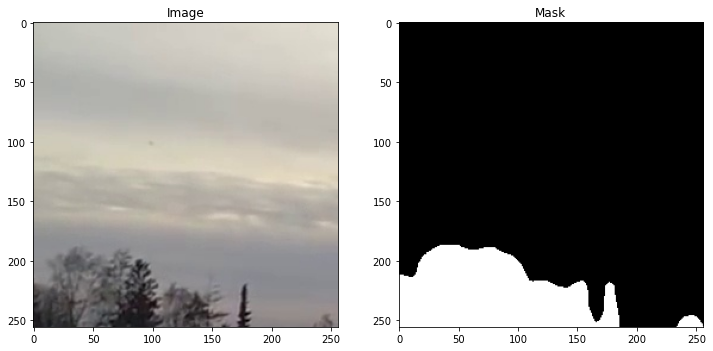

In [24]:
train_img_dir = "tram/256_patches/images/"
train_mask_dir = "tram/256_patches/masks_veg/"

img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

num_images = len(os.listdir(train_img_dir))


img_num = random.randint(0, num_images-1)

img_for_plot = cv2.imread(train_img_dir+img_list[img_num], 1)
img_for_plot = cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB)

mask_for_plot =cv2.imread(train_mask_dir+msk_list[img_num], 0)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot)
plt.title('Image')
plt.subplot(122)
plt.imshow(mask_for_plot, cmap='gray')
plt.title('Mask')
plt.show()

### delete the useless image patches

In [26]:
###########################################################################

#Now, let us copy images and masks with real information to a new folder.
# real information = if mask has decent amount of labels other than 0. 

useless=0  #Useless image counter
for img in range(len(img_list)):   #Using t1_list as all lists are of same size
    img_name=img_list[img]
    mask_name = msk_list[img]
    print("Now preparing image and masks number: ", img)
      
    temp_image=cv2.imread(train_img_dir+img_list[img], 1) # read as colored
   
    temp_mask=cv2.imread(train_mask_dir+msk_list[img], 0) # read as greyscale
    #temp_mask=temp_mask.astype(np.uint8)
    
    val, counts = np.unique(temp_mask, return_counts=True)
    
    if (1 - (counts[0]/counts.sum())) > 0.05:  #At least 5% useful area with labels that are not 0
        print("Save Me")
        cv2.imwrite('tram/256_patches/useful/images/'+img_name, temp_image)
        cv2.imwrite('tram/256_patches/useful/masks/'+mask_name, temp_mask)
        
    else:
        print("I am useless")   
        useless +=1


Now preparing image and masks number:  0
I am useless
Now preparing image and masks number:  1
I am useless
Now preparing image and masks number:  2
I am useless
Now preparing image and masks number:  3
I am useless
Now preparing image and masks number:  4
I am useless
Now preparing image and masks number:  5
Save Me
Now preparing image and masks number:  6
Save Me
Now preparing image and masks number:  7
I am useless
Now preparing image and masks number:  8
I am useless
Now preparing image and masks number:  9
I am useless
Now preparing image and masks number:  10
I am useless
Now preparing image and masks number:  11
I am useless
Now preparing image and masks number:  12
Save Me
Now preparing image and masks number:  13
I am useless
Now preparing image and masks number:  14
I am useless
Now preparing image and masks number:  15
I am useless
Now preparing image and masks number:  16
I am useless
Now preparing image and masks number:  17
I am useless
Now preparing image and masks numbe

In [27]:
print("Total images are: ", len(img_list)) # 2800
print("Total useful images are: ", len(img_list)-useless)  # 1158
print("Total useless images are: ", useless) # 1642

Total images are:  2800
Total useful images are:  1158
Total useless images are:  1642


## sanity check after extracting useful patches 

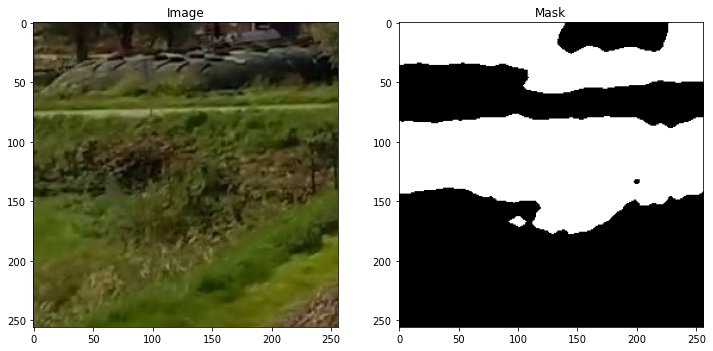

In [47]:
train_img_dir_use = "tram/256_patches/useful/images/"
train_mask_dir_use = "tram/256_patches/useful/masks/"

img_list = os.listdir(train_img_dir_use)
msk_list = os.listdir(train_mask_dir_use)

num_images = len(os.listdir(train_img_dir_use))


img_num = random.randint(0, num_images-1)

img_for_plot = cv2.imread(train_img_dir_use+img_list[img_num], 1)
img_for_plot = cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB)

mask_for_plot =cv2.imread(train_mask_dir_use+msk_list[img_num], 0)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot)
plt.title('Image')
plt.subplot(122)
plt.imshow(mask_for_plot, cmap='gray')
plt.title('Mask')
plt.show()

# split the tram images to train and val

In [28]:
input_folder = 'tram/256_patches/useful/'
output_folder = 'tram/traintest_bin/'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.80, .20), group_prefix=None) # default value

Copying files: 2316 files [01:36, 23.93 files/s]


#### manually adjusting the folders to use image_from_directory of keras

# Train

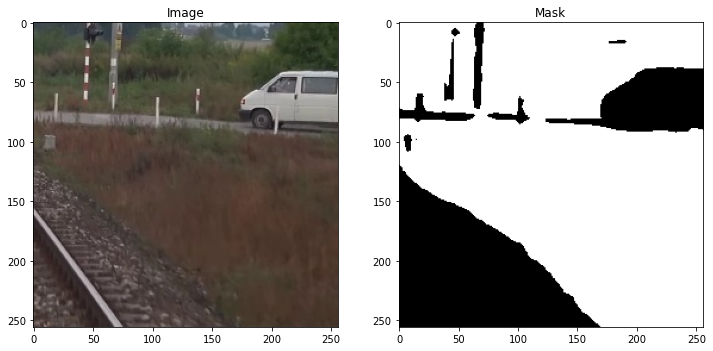

In [56]:
# Data Understanding

train_img_dir = "tram/split_data_aug/train_images/train/"
train_mask_dir = "tram/split_data_aug/train_masks/train/"

img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

num_images = len(os.listdir(train_img_dir))


img_num = random.randint(0, num_images-1)

img_for_plot = cv2.imread(train_img_dir+img_list[img_num], 1)
img_for_plot = cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB)

mask_for_plot =cv2.imread(train_mask_dir+msk_list[img_num], 0)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot)
plt.title('Image')
plt.subplot(122)
plt.imshow(mask_for_plot, cmap='gray')
plt.title('Mask')
plt.show()

In [57]:
seed=24
batch_size= 16
n_classes=2

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from keras.utils import to_categorical

## Train the Generators with Preprocessed Models 
### Use this to preprocess input for transfer learning

In [59]:
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

## Preprocess

In [60]:
#Define a function to perform additional preprocessing after datagen.
#For example, scale images, convert masks to categorical, etc. 
def preprocess_data(img, mask, num_class):
    #Scale images
    img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    img = preprocess_input(img)  #Preprocess based on the pretrained backbone...
    #Convert mask to one-hot
    mask = to_categorical(mask, num_class)
      
    return (img,mask)

## Generator

In [89]:
#!pip install Keras-Preprocessing

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [62]:
#We are not doing any rotation or zoom to make sure mask values are not interpolated.
#It is important to keep pixel values in mask as 0, 1, 2, 3, ..... 18

def trainGenerator(train_img_path, train_mask_path, num_class):
    
    img_data_gen_args = dict(horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='reflect')
    
    image_datagen = ImageDataGenerator(**img_data_gen_args)
    mask_datagen = ImageDataGenerator(**img_data_gen_args)
    
    #flow_from_directory
    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)# use same same for img and mask
    
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        color_mode = 'grayscale',
        batch_size = batch_size,
        seed = seed)# use same seed for img and masks
    
    train_generator = zip(image_generator, mask_generator)
    
    for (img, mask) in train_generator:
        img, mask = preprocess_data(img, mask, num_class)
        yield (img, mask) # yield the preprocessed images from the train_generator images in batches of batch_size=4

In [63]:
train_img_path = "tram/split_data_aug/train_images/"
train_mask_path = "tram/split_data_aug/train_masks/"
train_img_gen = trainGenerator(train_img_path, train_mask_path, num_class=2)

val_img_path = "tram/split_data_aug/val_images/"
val_mask_path = "tram/split_data_aug/val_masks/"
val_img_gen = trainGenerator(val_img_path, val_mask_path, num_class=2)

### traverse through images generated by image generator to do sanity check for images and masks 

Found 926 images belonging to 1 classes.
Found 926 images belonging to 1 classes.


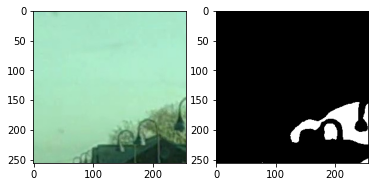

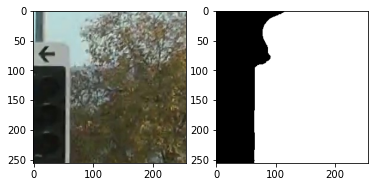

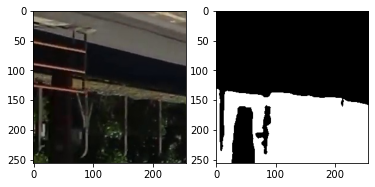

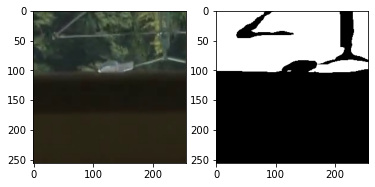

Found 232 images belonging to 1 classes.
Found 232 images belonging to 1 classes.


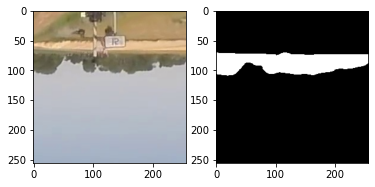

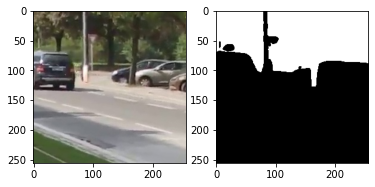

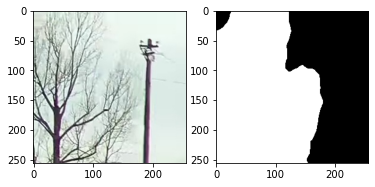

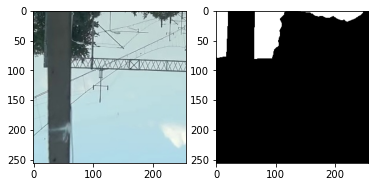

In [64]:
#Make sure the generator is working and that images and masks are indeed lined up. 
#Verify generator.... In python 3 next() is renamed as __next__()
x, y = train_img_gen.__next__()

for i in range(0,4):
    image = x[i]
    mask = np.argmax(y[i], axis=2)
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(mask, cmap='gray')
    plt.show()

x_val, y_val = val_img_gen.__next__()

for i in range(0,4):
    image = x_val[i]
    mask = np.argmax(y_val[i], axis=2)
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(mask, cmap='gray')
    plt.show()

# Define the Model 

In [65]:
###########################################################################
#Define the model metrcis and load model. 

num_train_imgs = len(os.listdir('tram/split_data_aug/train_images/train/'))
num_val_images = len(os.listdir('tram/split_data_aug/val_images/val/'))
steps_per_epoch = num_train_imgs//batch_size
val_steps_per_epoch = num_val_images//batch_size


IMG_HEIGHT = x.shape[1]
IMG_WIDTH  = x.shape[2]
IMG_CHANNELS = x.shape[3]

n_classes=2

# Using Pretrained U-net -> Transfer Learning

# U-Net Pretrained Encoder
## using Resnet34 as Backbone
## imagenet weights
### jaccard loss

### batch size 16

In [66]:
#############################################################################
#Use transfer learning using pretrained encoder in the U-Net
#(make sure you uncomment the preprocess_input part in the
# preprocess_data function above)
################################################################
#Define the model
# define model
model = sm.Unet(BACKBONE, encoder_weights='imagenet', 
                input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
                classes=n_classes, activation='softmax')
model.compile('Adam', loss=sm.losses.categorical_focal_jaccard_loss, metrics=[sm.metrics.iou_score])
#Other losses to try: categorical_focal_dice_loss, cce_jaccard_loss, cce_dice_loss, categorical_focal_loss

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

In [67]:
print(model.summary())
print(model.input_shape)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 bn_data (BatchNormalization)   (None, 256, 256, 3)  9           ['data[0][0]']                   
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['bn_data[0][0]']                
                                                                                                  
 conv0 (Conv2D)                 (None, 128, 128, 64  9408        ['zero_padding2d[0][0]']   

# Fit the model and save it 

In [70]:
#Fit the model
#history = model.fit(my_generator, validation_data=validation_datagen, steps_per_epoch=len(X_train) // 16, validation_steps=len(X_train) // 16, epochs=100)
#Train the model. 
history=model.fit(train_img_gen,
          steps_per_epoch=steps_per_epoch,
          epochs=30,
          verbose=1,
          validation_data=val_img_gen,
          validation_steps=val_steps_per_epoch)


model.save('model_30_epochs_batch16_binary.hdf5')

Epoch 1/30
57/57 [==============================] - 1424s 25s/step - loss: 0.3642 - iou_score: 0.6881 - val_loss: 0.9300 - val_iou_score: 0.2414
Epoch 2/30
57/57 [==============================] - 1295s 23s/step - loss: 0.3454 - iou_score: 0.7047 - val_loss: 0.7515 - val_iou_score: 0.3242
Epoch 3/30
57/57 [==============================] - 943s 17s/step - loss: 0.3395 - iou_score: 0.7112 - val_loss: 0.7860 - val_iou_score: 0.3179
Epoch 4/30
57/57 [==============================] - 1056s 19s/step - loss: 0.3156 - iou_score: 0.7322 - val_loss: 0.8393 - val_iou_score: 0.3025
Epoch 5/30
57/57 [==============================] - 1074s 19s/step - loss: 0.3074 - iou_score: 0.7391 - val_loss: 1.0597 - val_iou_score: 0.2841
Epoch 6/30
57/57 [==============================] - 1102s 19s/step - loss: 0.3076 - iou_score: 0.7400 - val_loss: 0.9011 - val_iou_score: 0.2862
Epoch 7/30
57/57 [==============================] - 1204s 21s/step - loss: 0.2957 - iou_score: 0.7517 - val_loss: 1.0116 - val_iou_

# plot the model IoU and loss for training and validation

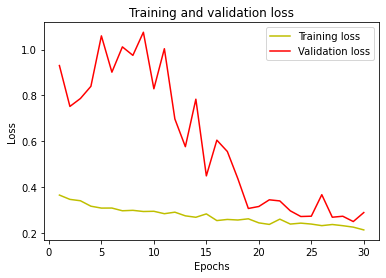

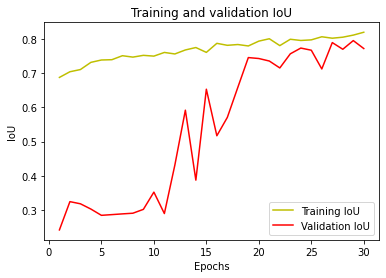

In [71]:
#plot the training and validation IoU and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['iou_score']
val_acc = history.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IoU')
plt.plot(epochs, val_acc, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.show()



In [82]:
accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']

#print ("Accuracy", accuracy )
#print ("Accuracy_validation", val_accuracy )

KeyError: 'accuracy'

# load the saved model

In [79]:
from keras.models import load_model

model = load_model("model_30_epochs_batch16_binary.hdf5", compile=False)

#batch_size=32 #Check IoU for a batch of images

#Test generator using validation data.

test_image_batch, test_mask_batch = val_img_gen.__next__()

#Convert categorical to integer for visualization and IoU calculation
test_mask_batch_argmax = np.argmax(test_mask_batch, axis=3) 
test_pred_batch = model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=3)

n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

1/1 [==============================] - 2s 2s/step
Mean IoU = 0.6954266


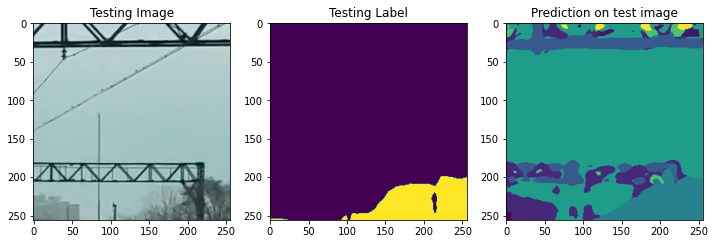

In [74]:
#######################################################
#View a few images, masks and corresponding predictions. 
img_num = random.randint(0, test_image_batch.shape[0]-1)

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_image_batch[img_num])
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_batch_argmax[img_num])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_pred_batch_argmax[img_num])
plt.show()

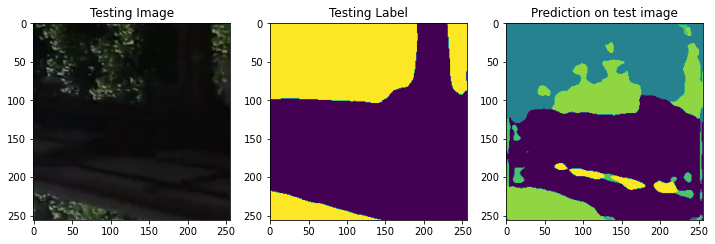

In [77]:
#######################################################
#View a few images, masks and corresponding predictions. 
img_num = random.randint(0, test_image_batch.shape[0]-1)

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_image_batch[img_num])
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_batch_argmax[img_num])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_pred_batch_argmax[img_num])
plt.show()